In [3]:
import matplotlib.pyplot as plt

In [4]:
import torch

In [5]:
import numpy as np
import pandas as pd
from rdkit import Chem

import openpyxl
import os
from pathlib import Path

In [6]:
%matplotlib inline

In [7]:
TOP = Path.cwd().as_posix().replace('notebooks','')
raw_dir = Path(TOP) / 'data'/'raw'
interim_dir = Path(TOP) / 'data'/'interim'
external_dir = Path(TOP) / 'data'/'external'
figures_dir = Path(TOP) / 'reports'/'figures/'
processed_dir = Path(TOP) / 'data'/'processed'


In [8]:
df = pd.read_csv(interim_dir/'rax_pairs_200125.csv', index_col = [0])
df

,Target,Analogue,Label,analogue_smi,target_smi,analogue_mol,target_mol,fps_target,fps_analogue,Tanimoto
1,DTXSID5023378,DTXSID0044496,1,CCCCCC1CCCC(=O)O1,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c882e0>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e1310>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.031746
2,DTXSID5023378,DTXSID4029301,1,Cl[SiH](Cl)Cl,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c884a0>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e1380>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.000000
3,DTXSID5023378,DTXSID8026488,1,CC1(C)C2CCC(C2)C1=C,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c88200>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e13f0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.019231
4,DTXSID5023378,DTXSID0029719,1,CCCCC(CC)COC(=O)CS[Sn](CCCC)(CCCC)SCC(=O)OCC(C...,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c88120>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e1460>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.057971
5,DTXSID5023378,DTXSID6047105,1,COC1=CC(C)=CC=C1O,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c88580>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e14d0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.170213
...,...,...,...,...,...,...,...,...,...,...
480938,DTXSID00391682,DTXSID6025804,1,CCCCCCC=C,CCC(C)(C)C1=CC(C)=C(O)C(C)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e10e0>,<rdkit.Chem.rdchem.Mol object at 0x7b9de6ee3c30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.095238
480939,DTXSID00391682,DTXSID7025631,1,CC1=CC=CC(=C1N)[N+]([O-])=O,CCC(C)(C)C1=CC(C)=C(O)C(C)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e1150>,<rdkit.Chem.rdchem.Mol object at 0x7b9de6ee3ca0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.102041
481633,DTXSID3020205,DTXSID6025804,1,CCCCCCC=C,CCCCOC(=O)C1=C(C=CC=C1)C(=O)OCC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e11c0>,<rdkit.Chem.rdchem.Mol object at 0x7b9de6ee3d10>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.101695
481634,DTXSID3020205,DTXSID7025631,1,CC1=CC=CC(=C1N)[N+]([O-])=O,CCCCOC(=O)C1=C(C=CC=C1)C(=O)OCC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e1230>,<rdkit.Chem.rdchem.Mol object at 0x7b9de6ee3d80>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.106061


In [9]:
final_df = (df.reset_index()
 .assign(pair = lambda df: df.apply(lambda row: tuple(sorted([row["Target"], row["Analogue"]])), axis=1)
        )
.drop_duplicates(subset=["pair"]).drop(columns=["pair"])
)

In [10]:
final_df.shape

(213531, 11)

In [11]:
final_df['analogue_mol'] = [Chem.MolFromSmiles(e) for e in final_df['analogue_smi']]

final_df['target_mol'] = [Chem.MolFromSmiles(e) for e in final_df['target_smi']]

In [12]:
from rdkit.Chem import rdFingerprintGenerator

In [13]:
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=3,fpSize=1024)

In [14]:
final_df = (final_df
 .assign(fps_target = lambda df: df.apply(lambda row: mfpgen.GetFingerprintAsNumPy(row['target_mol']), axis =1)
        )
  .assign(fps_analogue = lambda df: df.apply(lambda row: mfpgen.GetFingerprintAsNumPy(row['analogue_mol']), axis =1)
         )
)

In [15]:
final_df['Label'].value_counts()

Label
1    210372
0      3159
Name: count, dtype: int64

<Axes: >

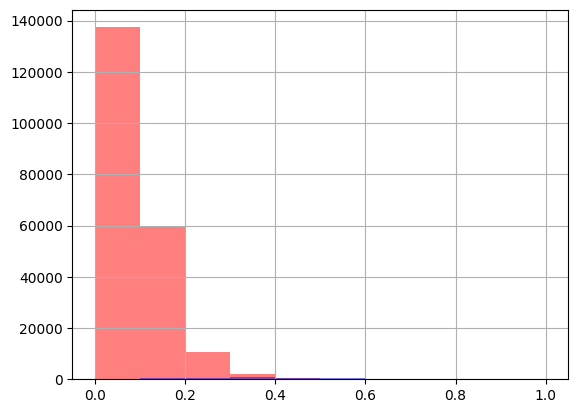

In [144]:
final_df[final_df['Label']==1]['Tanimoto'].hist(color = 'r', alpha = 0.5)
final_df[final_df['Label']==0]['Tanimoto'].hist(color = 'b', alpha = 0.5)

<Axes: >

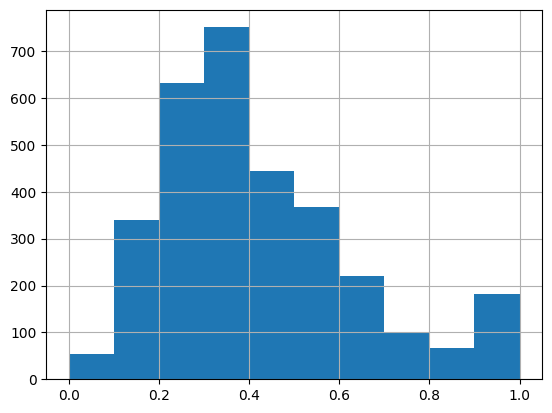

In [141]:
final_df[final_df['Label']==0]['Tanimoto'].hist()

In [16]:
similar_pairs = final_df[final_df['Label'] == 0]
dissimilar_pairs = final_df[final_df['Label'] == 1]

# Step 2: Downsample dissimilar pairs
downsampled_dissimilar_pairs = dissimilar_pairs.sample(n=len(similar_pairs), replace=False)

# Step 3: Combine balanced pairs
balanced_df = pd.concat([similar_pairs, downsampled_dissimilar_pairs])

# Step 4: Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42)

In [17]:
balanced_df['Label'].value_counts()

Label
1    3159
0    3159
Name: count, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
#from kennard_stone import train_test_split
from torch_geometric.loader import DataLoader
from torch.utils.data import Dataset


In [19]:
balanced_df.columns

Index(['index', 'Target', 'Analogue', 'Label', 'analogue_smi', 'target_smi',
       'analogue_mol', 'target_mol', 'fps_target', 'fps_analogue', 'Tanimoto'],
      dtype='object')

<Axes: >

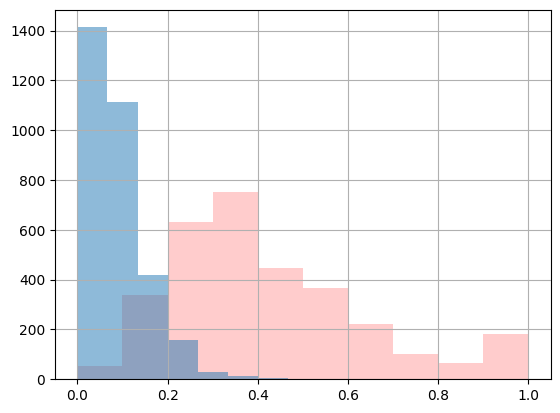

In [20]:
balanced_df[balanced_df['Label']==0].Tanimoto.hist(color = 'r', alpha = 0.2)
balanced_df[balanced_df['Label']==1].Tanimoto.hist(alpha = 0.5)

In [21]:
balanced_df.columns

Index(['index', 'Target', 'Analogue', 'Label', 'analogue_smi', 'target_smi',
       'analogue_mol', 'target_mol', 'fps_target', 'fps_analogue', 'Tanimoto'],
      dtype='object')

In [22]:
balanced_df.to_csv(interim_dir/'balanced_df_icf_230125.csv')

In [23]:
X_train, X_test, y_train, y_test  = train_test_split(balanced_df[['Target', 'Analogue','target_smi', 'analogue_smi', 'fps_target', 'fps_analogue', 'Label','Tanimoto', ]], balanced_df['Label'], stratify = balanced_df['Label'], random_state = 42,test_size=0.2)

In [24]:
y_train.value_counts(normalize = False)

Label
0    2527
1    2527
Name: count, dtype: int64

In [25]:
y_test.value_counts(normalize = True)

Label
0    0.5
1    0.5
Name: proportion, dtype: float64

In [26]:
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torch
import torch.optim as optim

In [27]:
X_train['fps_target'].values

array([array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
       array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
       array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), ...,
       array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
       array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
       array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)], dtype=object)

In [28]:
class ChemicalPairsDataset(Dataset):
    def __init__(self, df):
        """
        fp1: target column in df of numpy representation of Morgan fp
        fp2: analogue column in df of numpy representation of Morgan fp
        labels: List of 0 (similar) or 1 (dissimilar) for each pair
        """
        self.df = df
    
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        fp1,fp2 = row['fps_target'], row['fps_analogue']
        label = row['Label']
        identifier = (row['Target'], row['Analogue'])
        
        
        return torch.tensor(fp1, dtype=torch.float32), torch.tensor(fp2, dtype=torch.float32), label, identifier


In [29]:
train_dataset = ChemicalPairsDataset(X_train)
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)

test_dataset = ChemicalPairsDataset(X_test)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=True)


In [30]:
for fp1, fp2, label, identifier  in train_dataloader:
    print(identifier)
    break

[('DTXSID6026824', 'DTXSID0052259', 'DTXSID7021780', 'DTXSID9027522', 'DTXSID6047604', 'DTXSID4072780', 'DTXSID5025659', 'DTXSID7044764'), ('DTXSID9026714', 'DTXSID0020151', 'DTXSID8021482', 'DTXSID9044661', 'DTXSID60471515', 'DTXSID2027886', 'DTXSID3024368', 'Pubchem_102283662')]


In [31]:
X_train

,Target,Analogue,target_smi,analogue_smi,fps_target,fps_analogue,Label,Tanimoto
62635,DTXSID6047604,DTXSID20202963,CCCC(=O)OCCC1=CC=CC=C1,CCCCCCC(=O)OCC1=CC=CC=C1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0.392857
189408,DTXSID20194995,DTXSID20215058,CCCCCCCCCC(=O)OCC1=CC=CC=C1,CCCCCCCCC(=O)OCC1=CC=CC=C1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1.000000
17481,DTXSID7025683,DTXSID50315333,CN,CCOCC(=O)OC,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0.043478
206340,Pubchem_102283665,DTXSID1064663,CCCCCCCCCC(=O)OCCCC1=CC=CC=C1,CCCC(=O)OCCCC1=CC=CC=C1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...",0,0.692308
82730,DTXSID9063370,No_Stearate_sorbitol,CCCCCCCC(=O)OCC=C,O1CC(C(C1C(COC(CCCCCCCCCCCCCCCC)=O)O)O)O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0.377049
...,...,...,...,...,...,...,...,...
13805,DTXSID0029711,DTXSID5026413,Cl[Si](Cl)(Cl)Cl,C[SiH](Cl)Cl,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0.111111
45523,DTXSID60206647,Pubchem_102283661,CCCCCCCCC(=O)OCCC1=CC=CC=C1,CCCCCCCCC(=O)OCCCC1=CC=CC=C1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...",0,0.740741
81141,DTXSID8027329,DTXSID1027425,CCCCCCCCC=C,COC(=O)C1=CC=C(C=C1)C(O)=O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0.021739
55741,DTXSID5020653,DTXSID7024952,CN(C)C1=CC=C(C=C1)C(C1=CC=C(C=C1)N(C)C)=C1C=CC...,CCCCNCCCC,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0.020000


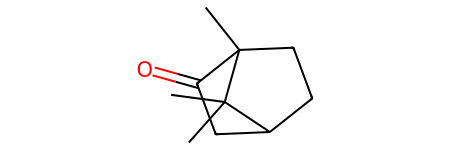

In [32]:
Chem.MolFromSmiles('CC1(C)C2CCC1(C)C(=O)C2')

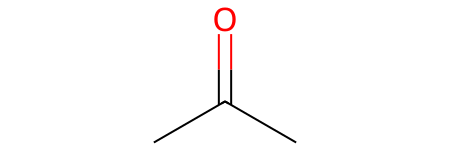

In [33]:
Chem.MolFromSmiles('CC(C)=O')

In [34]:
# Define the model
class ContrastiveNetwork(nn.Module):
    def __init__(self, input_dim, embedding_dim):
        super(ContrastiveNetwork, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, embedding_dim)
        )

    def forward(self, x):
        return self.encoder(x)

# Contrastive loss function
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, embedding1, embedding2, label):
        distance = torch.nn.functional.pairwise_distance(embedding1, embedding2)
        loss = torch.mean((1 - label) * torch.pow(distance, 2) +
                                      (label) * torch.pow(torch.clamp(self.margin - distance, min=0.0), 2))

        return loss

In [35]:
def compute_accuracy(model, dataloader, margin=1.0):
    model.eval()
    correct = 0
    total = 0
    all_predictions = []
    all_labels = []
    all_identifiers = []

    with torch.no_grad():
        for fp1, fp2, label, identifier in dataloader:
            emb1 = model(fp1)
            emb2 = model(fp2)
            distances = torch.nn.functional.pairwise_distance(emb1, emb2)
            

            # Use the margin as the decision boundary
            predictions = (distances > margin).long()  # Dissimilar if distance > margin
            correct += (predictions == label).sum().item()
            total += label.size(0)
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(label.cpu().numpy())
            all_identifiers.extend(identifier) 
            

    accuracy = correct / total
    print(f"Accuracy: {accuracy:.4f}")
    return accuracy, all_predictions, all_labels, all_identifiers

In [36]:
input_dim = 1024
embedding_dim = 128
model = ContrastiveNetwork(input_dim, embedding_dim)
criterion = ContrastiveLoss(margin=1.0)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [37]:
for epoch in range(50):
    model.train()  # Set model to training mode
    total_loss = 0.0

    for fp1, fp2, label, identifier in train_dataloader:
        optimizer.zero_grad()
        emb1 = model(fp1)
        emb2 = model(fp2)
        loss = criterion(emb1, emb2, label.float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Compute loss and accuracy for training and test sets
    train_accuracy = compute_accuracy(model, train_dataloader)[0]
    test_accuracy = compute_accuracy(model, test_dataloader)[0]
    
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_dataloader):.4f}, "
          f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")


Accuracy: 0.8937
Accuracy: 0.8742
Epoch 1, Loss: 0.0559, Train Accuracy: 0.8937, Test Accuracy: 0.8742
Accuracy: 0.9472
Accuracy: 0.9241
Epoch 2, Loss: 0.0177, Train Accuracy: 0.9472, Test Accuracy: 0.9241
Accuracy: 0.9565
Accuracy: 0.9399
Epoch 3, Loss: 0.0116, Train Accuracy: 0.9565, Test Accuracy: 0.9399
Accuracy: 0.9614
Accuracy: 0.9367
Epoch 4, Loss: 0.0089, Train Accuracy: 0.9614, Test Accuracy: 0.9367
Accuracy: 0.9707
Accuracy: 0.9462
Epoch 5, Loss: 0.0088, Train Accuracy: 0.9707, Test Accuracy: 0.9462
Accuracy: 0.9656
Accuracy: 0.9375
Epoch 6, Loss: 0.0080, Train Accuracy: 0.9656, Test Accuracy: 0.9375
Accuracy: 0.9759
Accuracy: 0.9509
Epoch 7, Loss: 0.0080, Train Accuracy: 0.9759, Test Accuracy: 0.9509
Accuracy: 0.9741
Accuracy: 0.9430
Epoch 8, Loss: 0.0062, Train Accuracy: 0.9741, Test Accuracy: 0.9430
Accuracy: 0.9850
Accuracy: 0.9636
Epoch 9, Loss: 0.0062, Train Accuracy: 0.9850, Test Accuracy: 0.9636
Accuracy: 0.9727
Accuracy: 0.9438
Epoch 10, Loss: 0.0063, Train Accuracy:

In [38]:
def visualize_distances_consistent(model, dataloader, margin=1.0):
    model.eval()
    similar_distances = []
    dissimilar_distances = []
    
    with torch.no_grad():
        for fp1, fp2, label, identifier in dataloader:
            emb1 = model(fp1)
            emb2 = model(fp2)
            distances = torch.nn.functional.pairwise_distance(emb1, emb2)
            
            # Separate distances by labels
            label = label.cpu().numpy()
            similar_distances.extend(distances[label == 0].cpu().numpy())
            dissimilar_distances.extend(distances[label == 1].cpu().numpy())
    
    # Plot histograms
    plt.figure(figsize=(10, 6))
    plt.hist(similar_distances, bins=30, alpha=0.6, color='blue', label='Similar Pairs (label=0)')
    plt.hist(dissimilar_distances, bins=30, alpha=0.6, color='red', label='Dissimilar Pairs (label=1)')
    plt.axvline(x=margin, color='black', linestyle='--', label='Training Margin')
    plt.xlabel('Pairwise Distance')
    plt.ylabel('Frequency')
    plt.title('Distribution of Pairwise Distances (Aligned with Training)')
    plt.legend()
    plt.show()

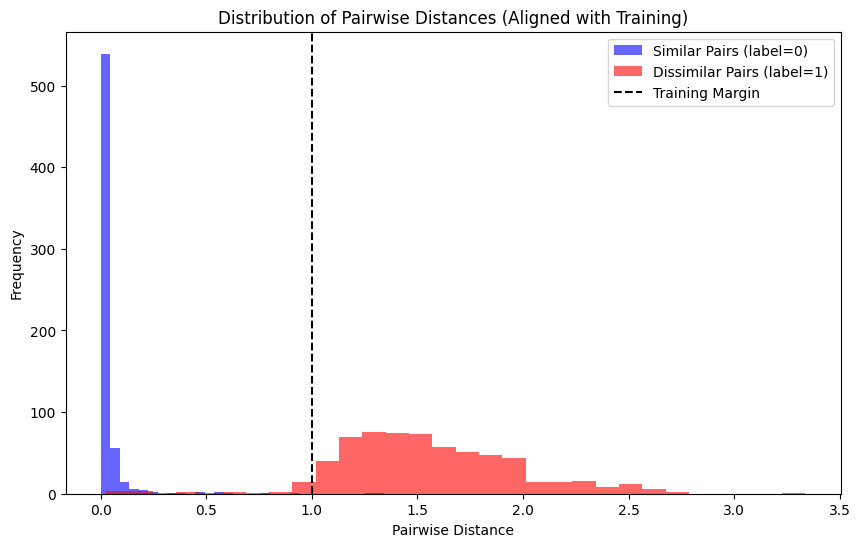

In [39]:
#| fig-label: fig-distances
visualize_distances_consistent(model, test_dataloader, margin=1.0)


In [40]:
def extract_pairwise_embeddings(model, dataloader):
    """
    Extract embeddings for pairs of substances, calculate distances, 
    and save labels and identifiers for analysis.
    """
    model.eval()
    embeddings_fp1 = []
    embeddings_fp2 = []
    distances = []
    labels = []
    identifiers = []  # To trace back the actual chemical pairs

    with torch.no_grad():
        for fp1, fp2, label, identifier in dataloader:
            # Compute embeddings for both substances in the pair
            emb1 = model(fp1)
            emb2 = model(fp2)
            
            # Compute the pairwise distance between embeddings
            distance = torch.nn.functional.pairwise_distance(emb1, emb2)
            
            # Save embeddings, distances, labels, and identifiers
            embeddings_fp1.append(emb1.cpu().numpy())
            embeddings_fp2.append(emb2.cpu().numpy())
            distances.append(distance.cpu().numpy())
            labels.append(label.cpu().numpy())
            identifiers.extend(identifier)

    # Concatenate lists into arrays for easier handling
    embeddings_fp1 = np.vstack(embeddings_fp1)
    embeddings_fp2 = np.vstack(embeddings_fp2)
    distances = np.concatenate(distances)
    labels = np.concatenate(labels)

    return embeddings_fp1, embeddings_fp2, distances, labels, identifiers

In [41]:
# Extract embeddings for the test set
embeddings_fp1, embeddings_fp2, distances, labels, identifiers = extract_pairwise_embeddings(model, test_dataloader)



In [42]:
X_test.shape

(1264, 8)

In [43]:
distances

array([0.03373282, 2.4620383 , 0.00438958, ..., 1.7086926 , 2.0257835 ,
       1.5240827 ], dtype=float32)

In [44]:
X_test1 = (X_test
 .assign(target_emb = lambda x: [ embeddings_fp1[i] for i in range(len(X_test))])
 .assign(analogue_emd =  lambda x: [ embeddings_fp2[i] for i in range(len(X_test))])
)

In [45]:
X_test1 = (X_test1
 .assign(embed_dist = distances)
 .assign(prediction = lambda df: df.apply(lambda x: 1 if x['embed_dist'] > 1 else 0, axis = 1)) # Dissimilar if distance > mar
)

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
confusion_matrix(X_test1['Label'], X_test1['prediction'])

array([[324, 308],
       [332, 300]])

In [48]:
print(classification_report(X_test1['Label'], X_test1['prediction']))

              precision    recall  f1-score   support

           0       0.49      0.51      0.50       632
           1       0.49      0.47      0.48       632

    accuracy                           0.49      1264
   macro avg       0.49      0.49      0.49      1264
weighted avg       0.49      0.49      0.49      1264



In [49]:
X_test1.columns

Index(['Target', 'Analogue', 'target_smi', 'analogue_smi', 'fps_target',
       'fps_analogue', 'Label', 'Tanimoto', 'target_emb', 'analogue_emd',
       'embed_dist', 'prediction'],
      dtype='object')

In [50]:
X_test1.target_emb.values[0]

array([-4.64553088e-02,  9.28314552e-02,  2.22417768e-02, -1.05785504e-01,
        2.49648765e-02, -1.39403977e-02, -5.01949973e-02,  1.04721338e-01,
        1.35368928e-01, -1.10108696e-01, -1.23968013e-01,  1.44256502e-01,
       -4.33721840e-02, -2.52565295e-02, -9.15389359e-02,  3.28419507e-02,
       -2.76714228e-02, -6.25678152e-03, -1.46949470e-01,  4.78350855e-02,
        3.28949168e-02,  4.56696376e-03, -9.04873386e-03,  8.90542567e-03,
        1.00958914e-01,  1.22848433e-02, -3.13498974e-02, -8.69177803e-02,
       -6.07947633e-03, -1.03711791e-01,  7.49081671e-02,  9.59672034e-02,
        9.95792598e-02, -4.97313738e-02, -2.45729759e-02, -5.36815636e-03,
       -3.60282436e-02, -3.43695879e-02,  1.49397217e-02,  7.33451396e-02,
       -2.92615667e-02, -6.99940324e-02, -3.26527618e-02, -4.06499803e-02,
       -5.30711375e-02,  3.20037790e-02, -3.97073776e-02,  2.91362870e-03,
       -7.98587948e-02, -1.57466158e-02,  7.75141269e-02,  2.78932005e-02,
        2.02903777e-01,  

In [51]:
def cosine_sim(vec1, vec2):
    return cosine_similarity([vec1], [vec2])[0][0]

In [52]:
print(type(X_test1['target_emb'].iloc[0]))

<class 'numpy.ndarray'>


<Axes: xlabel='Tanimoto', ylabel='cosine_sim'>

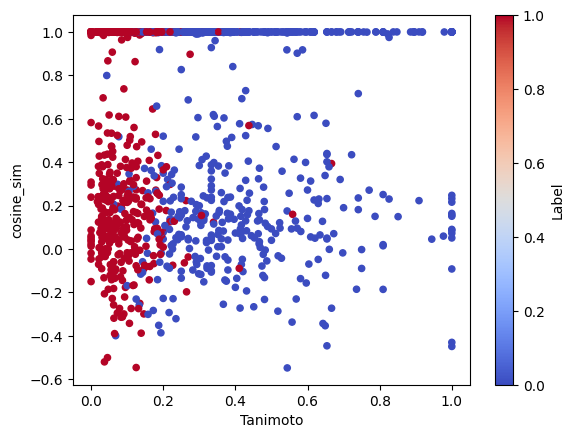

In [53]:
from sklearn.metrics.pairwise import cosine_similarity
(X_test1
 .assign(cosine_sim = lambda x:x.apply(lambda row: cosine_sim(row['target_emb'], row['analogue_emd']), axis =1))
 .plot(kind = 'scatter', x = 'Tanimoto', y = 'cosine_sim', c = 'Label', cmap = 'coolwarm')
)
 

In [54]:
tr_embeddings_fp1, tr_embeddings_fp2, tr_distances, tr_labels, tr_identifiers = extract_pairwise_embeddings(model, train_dataloader)

In [55]:
import umap
import seaborn as sns
from sklearn.decomposition import PCA

In [56]:
def plot_2D_embeddings(embeddings_fp1, embeddings_fp2, labels, method='PCA'):
    """
    Visualize the embeddings of fp1 and fp2 in 2D space using PCA or UMAP.
    
    Parameters:
        embeddings_fp1: Embeddings for fp1 (numpy array)
        embeddings_fp2: Embeddings for fp2 (numpy array)
        labels: Labels indicating similar (0) or dissimilar (1)
        method: Dimensionality reduction method ('PCA' or 'UMAP')
    """
    # Concatenate embeddings to project both fp1 and fp2 in the same 2D space
    combined_embeddings = np.vstack([embeddings_fp1, embeddings_fp2])
    combined_labels = np.hstack([labels, labels])  # Duplicate labels for visualization

    # Perform dimensionality reduction
    if method == 'PCA':
        reducer = PCA(n_components=2)
    elif method == 'UMAP':
        reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    else:
        raise ValueError("Method should be either 'PCA' or 'UMAP'")
    
    reduced_embeddings = reducer.fit_transform(combined_embeddings)
    
    # Split reduced embeddings back into fp1 and fp2
    reduced_fp1 = reduced_embeddings[:len(embeddings_fp1)]
    reduced_fp2 = reduced_embeddings[len(embeddings_fp1):]

    # Plot embeddings
    plt.figure(figsize=(12, 8))
    plt.scatter(
        reduced_fp1[:, 0],
        reduced_fp1[:, 1],
        c=combined_labels[:len(embeddings_fp1)],
        cmap='coolwarm',
        alpha=0.7,
        label='FP1'
    )
    plt.scatter(
        reduced_fp2[:, 0],
        reduced_fp2[:, 1],
        c=combined_labels[len(embeddings_fp1):],
        cmap='coolwarm',
        alpha=0.7,
        marker='x',
        label='FP2'
    )
    plt.colorbar(label='Label (0=Similar, 1=Dissimilar)')
    plt.title(f'2D Visualization of Embeddings ({method})')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()


/home/grace/anaconda3/envs/pytorch_cuda/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


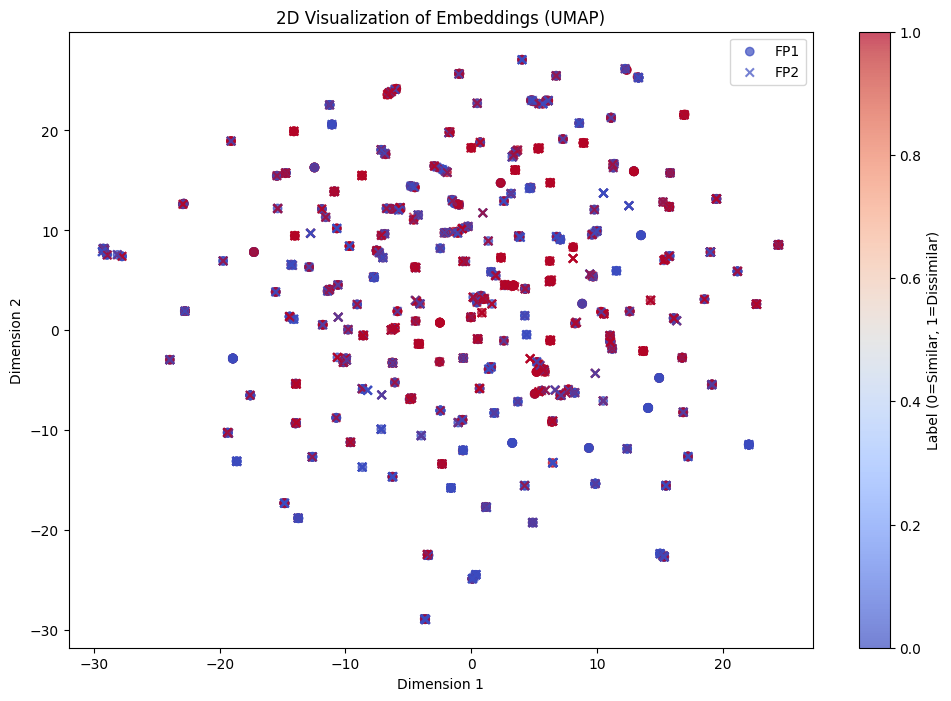

In [57]:
#| fig-label: fig-embed
plot_2D_embeddings(embeddings_fp1, embeddings_fp2, labels, method='UMAP')

In [58]:
device = torch.device('cpu')
train_losses = []  # To store average train loss per epoch
test_losses = []   # To store average test loss per epoch
for epoch in range(50):
    train_loss = 0.0
    test_loss = 0.0
    model.train()  # Set model to training mode

    # Training loop
    for fp1, fp2, label, identifier in train_dataloader:
        # Move data to the device (GPU or CPU)
        fp1, fp2, label = fp1.to(device), fp2.to(device), label.to(device)

        optimizer.zero_grad()
        emb1 = model(fp1)
        emb2 = model(fp2)
        loss = criterion(emb1, emb2, label.float())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Average train loss per epoch
    # Average train loss per epoch, only append once per epoch
    avg_train_loss = train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)
    print(f"Epoch {epoch+1}: Training loss = {train_loss / len(train_dataloader)}")

    # Evaluation loop
    model.eval()
    with torch.no_grad():
        for fp1, fp2, label, _ in test_dataloader:
            # Move test data to the device (GPU or CPU)
            fp1, fp2, label = fp1.to(device), fp2.to(device), label.to(device)

            emb1 = model(fp1)
            emb2 = model(fp2)
            test_loss += criterion(emb1, emb2, label.float()).item()

    # Average test loss per epoch
    avg_test_loss = test_loss / len(test_dataloader)
    test_losses.append(avg_test_loss)
    print(f"Epoch {epoch+1}: Test loss = {test_loss / len(test_dataloader)}")

# After all epochs, check the lengths
print(f"Number of train losses: {len(train_losses)}")
print(f"Number of test losses: {len(test_losses)}")


Epoch 1: Training loss = 0.002233458337098694
Epoch 1: Test loss = 0.011505169590940327
Epoch 2: Training loss = 0.0025550871073180634
Epoch 2: Test loss = 0.011159955945453177
Epoch 3: Training loss = 0.002398513690625942
Epoch 3: Test loss = 0.012385462947792206
Epoch 4: Training loss = 0.00293793134258725
Epoch 4: Test loss = 0.01274910894953705
Epoch 5: Training loss = 0.0030509167410323807
Epoch 5: Test loss = 0.01211270503382248
Epoch 6: Training loss = 0.0024515314688415306
Epoch 6: Test loss = 0.01260983686435121
Epoch 7: Training loss = 0.002520737835669648
Epoch 7: Test loss = 0.013113400543441981
Epoch 8: Training loss = 0.0023828244728334325
Epoch 8: Test loss = 0.011348029175338694
Epoch 9: Training loss = 0.0018747459504411576
Epoch 9: Test loss = 0.01202174947362621
Epoch 10: Training loss = 0.0018814939850731215
Epoch 10: Test loss = 0.011412278520556873
Epoch 11: Training loss = 0.0021960691304755463
Epoch 11: Test loss = 0.013298307375822056
Epoch 12: Training loss = 

In [59]:
print(f"Training batches: {len(train_dataloader)}")
print(f"Testing batches: {len(test_dataloader)}")

Training batches: 632
Testing batches: 158


Text(0.5, 1.0, 'Training and Test Loss Curves')

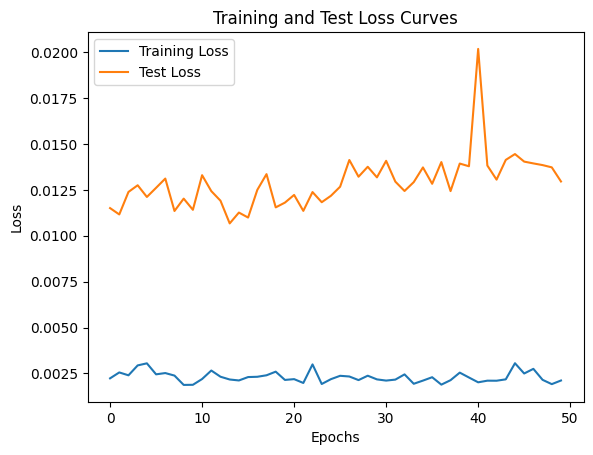

In [ ]:
plt.plot(range(50), train_losses, label='Training Loss')
plt.plot(range(50), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Loss Curves')

## GraphBased Networks

In [86]:
from torch.nn import Linear, Sequential, BatchNorm1d, ReLU, Dropout
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GINConv
from torch_geometric.nn import global_mean_pool, global_add_pool
from torch_geometric.data import Data, Dataset, DataLoader

In [87]:
def mol_to_graph(mol):
        """
        Converts an RDKit mol object into a graph representation with atom and bond features.
        
        :param mol: RDKit mol object representing a molecule.
        :return: PyTorch Geometric Data object containing graph representation of the molecule.
        """
        atom_features = []
        bond_features = []
        edge_index = []
        
        # Atom feature extraction
        for atom in mol.GetAtoms():
            atom_feature = [
                atom.GetAtomicNum(),                         # Atomic number
                atom.GetFormalCharge(),                      # Formal charge
                atom.GetHybridization().real,                # Hybridization
                atom.GetIsAromatic(),                        # Aromaticity
                atom.GetImplicitValence(),                   # Implicit valence
                atom.GetDegree(),                            # Number of bonds to other atoms
                atom.IsInRing(),                             # Is in ring
                atom.GetChiralTag(),                         # Chirality
                atom.GetExplicitValence(),                   # Explicit valence
                atom.GetNumRadicalElectrons(),               # Number of radical electrons
                atom.GetTotalNumHs(),                        # Total number of hydrogens
                atom.GetIsotope(),                           # Isotope (if any)
                atom.GetMass()                               # Atomic mass
            ]
            atom_features.append(atom_feature)
        
        # Bond feature extraction
        for bond in mol.GetBonds():
            i = bond.GetBeginAtomIdx()
            j = bond.GetEndAtomIdx()
            edge_index.extend([[i, j], [j, i]])  # Add bidirectional edges
            
            bond_feature = [
                bond.GetBondTypeAsDouble(),                  # Bond type (single, double, triple, aromatic)
                bond.GetIsConjugated(),                      # Is conjugated
                bond.IsInRing(),                             # Is in ring
                bond.GetStereo(),                            # Bond stereochemistry (cis/trans)
                bond.GetBondDir()                            # Bond direction (up/down in 3D)
            ]
            bond_features.extend([bond_feature, bond_feature])  # Add twice for bidirectional edges
        
        # Convert to tensors
        x = torch.tensor(atom_features, dtype=torch.float)
        edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
        edge_attr = torch.tensor(bond_features, dtype=torch.float)
        
        return Data(x=x, edge_index=edge_index, edge_attr=edge_attr)
  

In [88]:
X_train.head(1)

,Target,Analogue,target_smi,analogue_smi,fps_target,fps_analogue,Label,Tanimoto
62635,DTXSID6047604,DTXSID20202963,CCCC(=O)OCCC1=CC=CC=C1,CCCCCCC(=O)OCC1=CC=CC=C1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0.392857


In [89]:
class GraphData(Dataset):
    def __init__(self, df):
        """
        GraphData class inheriting from the Dataset class in PyTorch.

        Parameters
        ----------
    
        node_vec_len : int
            Node vector length of molecular graphs
        max_atoms : int
            Maximum number of atoms in molecular graphs
        """
        self.df = df

        # Create lists
        #self.indices = df.index.to_list()
        #self.smiles = df["smiles"].to_list()
        #self.outputs = df["measured log solubility in mols per litre"].to_list()

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        
        """
        Returns node matrix, adjacency matrix, output, and SMILES string of
        molecule.

        Parameters
        ----------
        i : int
            Dataset index

        Returns
        -------
        node_mat : torch.Tensor with dimension (max_atoms,node_vec_len)
            Node matrix
        adj_mat: torch.Tensor with dimension (max_atoms,max_atoms)
            Adjacency matrix
        output : torch.Tensor with dimension n_outputs
            Output vector
        smile : str
            SMILES string of molecule
        """
        
        row = self.df.iloc[idx]
        target_mol = Chem.MolFromSmiles(row['target_smi'])
        analogue_mol =Chem.MolFromSmiles(row['analogue_smi'])
        target = mol_to_graph(target_mol)
        analogue = mol_to_graph(analogue_mol)


        # Get output
        label = torch.tensor(row['Label'], dtype=torch.long)

        return target, analogue, label

   

In [90]:
train_data = GraphData(X_train)

In [102]:
test_data = GraphData(X_test)

In [103]:
test_data[0][0].num_features

13

In [110]:
class GIN(torch.nn.Module):
    """GIN"""
    def __init__(self, dim_h):
        super(GIN, self).__init__()
        self.conv1 = GINConv(
            Sequential(Linear(13, dim_h),
                       BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv2 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv3 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.lin1 = Linear(dim_h*3, dim_h*3)
        #self.lin2 = Linear(dim_h*3, 1)

    def forward_once(self, data, batch=torch.tensor([0])):
        x, edge_index = data.x, data.edge_index
        # Node embeddings 
        h1 = self.conv1(x, edge_index)
        h2 = self.conv2(h1, edge_index)
        h3 = self.conv3(h2, edge_index)

        # Graph-level readout
        h1 = global_mean_pool(h1, batch)
        h2 = global_mean_pool(h2, batch)
        h3 = global_mean_pool(h3, batch)

        # Concatenate graph embeddings
        h = torch.cat((h1, h2, h3), dim=1)

        # Classifier
        #h = self.lin1(h)
        #h = h.relu()
        #h = F.dropout(h, p=0.5, training=self.training)
        #h = self.lin2(h)
        
        return h
       
        
    def forward(self, input1, input2):
       
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)

        return output1, output2
    
    

In [119]:
gin = GIN(dim_h=32)


In [129]:
def normalize_embeddings(embeddings):
    return embeddings / embeddings.norm(p=2, dim=1, keepdim=True)

In [130]:
def compute_ginaccuracy(model, dataloader, margin=1.0):
    model.eval()
    correct = 0
    total = 0
    all_predictions = []
    all_labels = []
    

    with torch.no_grad():
        for data in dataloader:
            input1, input2, label = data
            output1, output2 = model(input1, input2)
            # Normalize embeddings
            output1 = normalize_embeddings(output1)
            output2 = normalize_embeddings(output2)

            
            distances = torch.nn.functional.pairwise_distance(output1, output2)
            

            # Use the margin as the decision boundary
            predictions = (distances > margin).long()  # Dissimilar if distance > margin
            correct += (predictions == label).sum().item()
            total += label.size(0)
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(label.cpu().numpy())
            
            

    accuracy = correct / total
    print(f"Accuracy: {accuracy:.4f}")
    return accuracy, all_predictions, all_labels

In [131]:
from torch_geometric.nn.models import GAT, GIN
from torch_geometric.nn import global_mean_pool, global_add_pool, global_max_pool


In [133]:
class ContrastiveLoss(torch.nn.Module):
    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        # Euclidean distance between the embeddings
        euclidean_distance = F.pairwise_distance(output1, output2, keepdim = True)

        # Contrastive loss formula
        contrastive_loss = torch.mean((1 - label) * torch.pow(euclidean_distance, 2) +
                                      (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))

        return contrastive_loss

In [134]:
criterion = ContrastiveLoss()
#optimizer = torch.optim.SGD(params=gin.parameters(), lr=0.005)

optimizer = torch.optim.Adam(gin.parameters(), lr=0.0005)

In [135]:
train_loader = DataLoader(train_data, batch_size=100, shuffle=True, drop_last=True)

In [136]:
train_data[0]

(Data(x=[14, 13], edge_index=[2, 28], edge_attr=[28, 5]),
 Data(x=[16, 13], edge_index=[2, 32], edge_attr=[32, 5]),
 tensor(0))

In [137]:
test_loader = DataLoader(test_data, batch_size=1, shuffle=False, drop_last=True)

In [127]:
for data in train_loader:
    print(data)
    break

[DataBatch(x=[1317, 13], edge_index=[2, 2582], edge_attr=[2582, 5], batch=[1317], ptr=[101]), DataBatch(x=[1312, 13], edge_index=[2, 2584], edge_attr=[2584, 5], batch=[1312], ptr=[101]), tensor([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        1, 0, 0, 0])]


In [138]:
for epoch in range(50):
    gin.train()  # Set model to training mode
    total_loss = 0.0

    for data in train_loader:
        input1, input2, label = data
        optimizer.zero_grad()
        output1, output2 = gin(input1, input2)
        
        output1 = normalize_embeddings(output1)
        output2 = normalize_embeddings(output2)
        
        loss = criterion(output1, output2, label.float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Compute loss and accuracy for training and test sets
    train_accuracy = compute_ginaccuracy(gin, train_loader)[0]
    test_accuracy = compute_ginaccuracy(gin, test_loader)[0]
    
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader):.4f}, "
          f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

Accuracy: 0.4988
Accuracy: 0.7421
Epoch 1, Loss: 1.4009, Train Accuracy: 0.4988, Test Accuracy: 0.7421
Accuracy: 0.5006
Accuracy: 0.6661
Epoch 2, Loss: 1.1887, Train Accuracy: 0.5006, Test Accuracy: 0.6661
Accuracy: 0.4990
Accuracy: 0.6203
Epoch 3, Loss: 1.1560, Train Accuracy: 0.4990, Test Accuracy: 0.6203
Accuracy: 0.4998
Accuracy: 0.6717
Epoch 4, Loss: 1.1634, Train Accuracy: 0.4998, Test Accuracy: 0.6717
Accuracy: 0.4994
Accuracy: 0.7271
Epoch 5, Loss: 1.1836, Train Accuracy: 0.4994, Test Accuracy: 0.7271
Accuracy: 0.5002
Accuracy: 0.6693
Epoch 6, Loss: 1.1194, Train Accuracy: 0.5002, Test Accuracy: 0.6693
Accuracy: 0.4996
Accuracy: 0.6638
Epoch 7, Loss: 1.1271, Train Accuracy: 0.4996, Test Accuracy: 0.6638
Accuracy: 0.5036
Accuracy: 0.7484
Epoch 8, Loss: 1.1045, Train Accuracy: 0.5036, Test Accuracy: 0.7484
Accuracy: 0.5008
Accuracy: 0.6187
Epoch 9, Loss: 1.2068, Train Accuracy: 0.5008, Test Accuracy: 0.6187
Accuracy: 0.5026
Accuracy: 0.6203
Epoch 10, Loss: 1.1291, Train Accuracy:

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [83]:
def test_network(model, test_loader, threshold=5):
    true_labels = np.empty((0,))
    predicted_labels = np.empty((0,))
    euclidean = np.empty((0,))
    
    model.eval()
    
    with torch.no_grad():
        for i, data in enumerate(test_loader,0):
            # Unpack data
            input1, input2, label = data
            #print(label)
            
            output1, output2 = model(input1, input2)
            #print(output1, output2)
            euclidean_distance = F.pairwise_distance(output1, output2)
            predictions = (euclidean_distance > threshold).float()
            

            true_labels = np.append(true_labels, label.view(-1).cpu().numpy())
            predicted_labels = np.append(predicted_labels, predictions.view(-1).cpu().numpy())
            euclidean = np.append(euclidean, euclidean_distance.view(-1).cpu().numpy())
            
            #print(input1['smiles'], input2['smiles'], label, euclidean_distance.item())
            
           

    
    

        return true_labels, predicted_labels, euclidean

In [100]:
a, b, c =test_network(gin, test_loader, threshold = 1)

In [101]:
test_data[2]

(Data(x=[4, 9], edge_index=[2, 6], edge_attr=[6, 3], smiles='CC(C)=C'),
 Data(x=[6, 9], edge_index=[2, 10], edge_attr=[10, 3], smiles='CCC=CCO'),
 tensor(1))

In [102]:
a[2], b[2], c[2]

(1.0, 0.0, 0.45941683650016785)

(array([856., 156.,  37.,  18.,   5.,   2.,   2.,   0.,   3.,   7.]),
 array([9.77125183e-06, 1.07357628e+00, 2.14714279e+00, 3.22070930e+00,
        4.29427581e+00, 5.36784231e+00, 6.44140882e+00, 7.51497533e+00,
        8.58854184e+00, 9.66210835e+00, 1.07356749e+01]),
 <BarContainer object of 10 artists>)

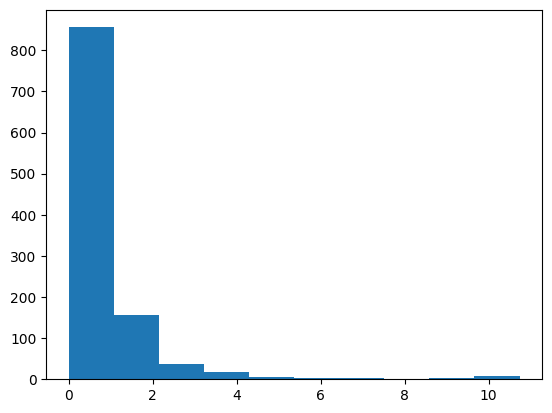

In [103]:
plt.hist(c)

In [104]:
from sklearn.metrics import balanced_accuracy_score,accuracy_score,f1_score, confusion_matrix, recall_score, precision_score

In [121]:
accuracy_score(a, b)

0.6731123388581952

In [122]:
precision = precision_score(a, b)
recall = recall_score(a, b)
f1 = f1_score(a, b)
cm = confusion_matrix(a,b)

In [123]:
print(precision, recall, f1)

0.8884297520661157 0.39594843462246776 0.5477707006369427


In [124]:
print(cm)


[[516  27]
 [328 215]]


In [109]:
new_cols = pd.DataFrame(list(zip(a,b,c)), columns = ['true_label', 'pred_label', 'Euclidean'])


In [117]:
X_test.reset_index(drop = True, inplace =True)

In [118]:
X_test1 = pd.concat([X_test, new_cols], axis = 1)

In [119]:
X_test1

,Target,Analogue,target_smi,analogue_smi,Label,tanimoto,true_label,pred_label,Euclidean
0,DTXSID1026746,DTXSID2021947,CCC=C,CCCCCCCCCCCCCO,1,0.125000,1.0,0.0,0.152989
1,DTXSID40337923,DTXSID0047666,CCCCCCCCC(CC)CO,CCCC(=O)OCC=C,1,0.106383,1.0,0.0,0.498635
2,DTXSID9020748,DTXSID40862700,CC(C)=C,CCC=CCO,1,0.111111,1.0,0.0,0.459417
3,DTXSID1020431,DTXSID6026088,ClC1=CC=C(Cl)C=C1,ClC1=C(Cl)C(Cl)=C(Cl)C=C1,0,0.277778,0.0,0.0,0.893328
4,DTXSID4024012,DTXSID1024128,BrC1=CC=C(Br)C=C1,BrC1=C(Br)C(Br)=C(Br)C(Br)=C1Br,0,0.230769,0.0,1.0,7.270732
...,...,...,...,...,...,...,...,...,...
1081,DTXSID7024320,DTXSID8047763,ClC1=CC(Cl)=C(Cl)C=C1Cl,[S-]C#N,1,0.000000,1.0,1.0,1.415262
1082,DTXSID4026761,DTXSID80168576,COC=C,CNP(=O)(NC)N(C)C,1,0.045455,1.0,1.0,1.424851
1083,DTXSID501015053,DTXSID5026750,CCC(C)(C)CCCC(=O)OCC=C,CCCS,1,0.073171,1.0,0.0,0.765557
1084,DTXSID2027412,DTXSID20194995,CCCCOCCOCCOCCOCCO,CCCCCCCCCC(=O)OCC1=CC=CC=C1,1,0.135593,1.0,1.0,1.283402


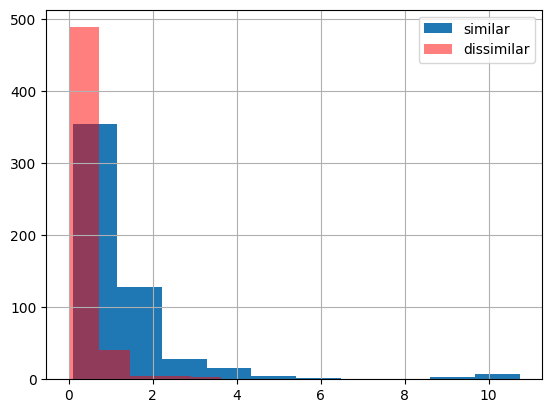

In [120]:
X_test1[X_test1['Label'] ==1]['Euclidean'].hist(label = 'similar')
X_test1[X_test1['Label'] ==0]['Euclidean'].hist(color = 'r', alpha = 0.5, label = 'dissimilar')
plt.legend()